# Chapter 2: Combining & Visualizing Data

## Author: Audrey Marthin

### Sources: 
- https://pandas.pydata.org/docs/ 
- https://seaborn.pydata.org/examples/index.html
- Professor Wirfs-Brock's Class Code Demo
- Audrey's projects

Date: Sunday, December 10

### Part 1: Combining Multiple Datasets
What if we want to use multiple datasets that are of similar topic range? 

We can combine these datasets based on some values they have in common. If we want to combine datasets where they have 1 shared column, we can do so by doing a merge/join.

In [107]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [98]:
# Import csv files
df_co2_emission = pd.read_csv("data/annual-co2-emissions-per-country.csv")
df_carbon_intensity = pd.read_csv("data/carbon-intensity-vs-gdp.csv")

# Examine
df_co2_emission

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


#### Merge Data

In [99]:
# Merge the first two data tables on "Entity", "Code", and "Year"
df_carbon_co2 = df_co2_emission.merge(df_carbon_intensity, on=["Entity", "Code", "Year"], how="inner")
df_carbon_co2


,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),"GDP per capita, PPP (constant 2017 international $)",Continent
0,Afghanistan,AFG,1980,1756302.0,0.225434,NaN,NaN
1,Afghanistan,AFG,1981,1978463.0,0.225406,NaN,NaN
2,Afghanistan,AFG,1982,2094580.9,0.224059,NaN,NaN
3,Afghanistan,AFG,1983,2519954.0,0.220350,NaN,NaN
4,Afghanistan,AFG,1984,2821540.0,0.245585,NaN,NaN
...,...,...,...,...,...,...,...
10399,Zimbabwe,ZWE,2017,9295629.0,0.205399,2331.7808,NaN
10400,Zimbabwe,ZWE,2018,10714598.0,0.206808,2399.6216,NaN
10401,Zimbabwe,ZWE,2019,9775428.0,0.211957,2203.3967,NaN
10402,Zimbabwe,ZWE,2020,7849639.0,0.186911,1990.3195,NaN


In [100]:
# Drop Continent column since we doon't need to look at that
df_carbon_co2.drop(columns="Continent")

# Drop rows where the "Code" column has NaN values in-place to remove regions from data
df_carbon_co2.dropna(subset=["Code"], inplace=True)

# Drop rows where the "Entity" column contains the value "World"
df_carbon_co2 = df_carbon_co2[df_carbon_co2["Entity"] != "World"]

# Fill NaN values with 0
df_carbon_co2.fillna(0)

,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),"GDP per capita, PPP (constant 2017 international $)",Continent
0,Afghanistan,AFG,1980,1756302.0,0.225434,0.0000,0
1,Afghanistan,AFG,1981,1978463.0,0.225406,0.0000,0
2,Afghanistan,AFG,1982,2094580.9,0.224059,0.0000,0
3,Afghanistan,AFG,1983,2519954.0,0.220350,0.0000,0
4,Afghanistan,AFG,1984,2821540.0,0.245585,0.0000,0
...,...,...,...,...,...,...,...
10399,Zimbabwe,ZWE,2017,9295629.0,0.205399,2331.7808,0
10400,Zimbabwe,ZWE,2018,10714598.0,0.206808,2399.6216,0
10401,Zimbabwe,ZWE,2019,9775428.0,0.211957,2203.3967,0
10402,Zimbabwe,ZWE,2020,7849639.0,0.186911,1990.3195,0


In [101]:
# Make sure we have only just countries
df_carbon_co2["Entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', '

We can find correlations of the data values using .corr()

In [110]:
# Examine the correlation between Annual CO₂ emissions, Annual CO₂ emissions per unit energy, and GDP per capita using .corr()
# More on .corr: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
column_corr = ["Annual CO₂ emissions", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)", "GDP per capita, PPP (constant 2017 international $)"]
df_carbon_co2_corr = df_carbon_co2[column_corr].corr()
df_carbon_co2_corr

,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),"GDP per capita, PPP (constant 2017 international $)"
Annual CO₂ emissions,1.000000,0.016869,0.103106
Annual CO₂ emissions per unit energy (kg per kilowatt-hour),0.016869,1.000000,-0.108481
"GDP per capita, PPP (constant 2017 international $)",0.103106,-0.108481,1.000000


#### Normalize Data
Often times, we want to view data in a normalized way for clearer value comparisons.

Can we rank these countries based on their CO2 emission data?

In [102]:
# Let's look at the values first
df_carbon_co2.describe()

,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),"GDP per capita, PPP (constant 2017 international $)"
count,9434.000000,9.434000e+03,9271.000000,5822.000000
mean,1998.298389,1.397357e+08,0.229665,17723.839743
std,14.580363,6.241809e+08,0.199214,20117.661888
min,1965.000000,0.000000e+00,0.000000,436.376400
25%,1987.000000,1.252344e+06,0.171357,3562.550250
50%,1999.000000,9.864614e+06,0.213613,10180.500500
75%,2011.000000,6.055316e+07,0.254929,25489.770000
max,2022.000000,1.139678e+10,10.685903,157602.480000


We can try the min-max normalization:

Scaled Value = (Old Value - Min) / (Max - Min)

More on min-max normalization: https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79

In [103]:
# Here's how we can normalize all columns at once
# Get column we care about
column_rank = ["Entity", "Year", "Annual CO₂ emissions", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)"]

# Make dataframe with just the columns we wanted in the ranking metrics
df_rank = df_carbon_co2[column_rank]

# Make a copy the data frame
df_rank_normalized = df_rank.copy()

# Make columns to normalize
column_norm = ["Annual CO₂ emissions", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)"]

# Apply normalization techniques
for col in column_norm:
    df_rank_normalized[col] = (df_rank_normalized[col] - df_rank_normalized[col].min()) / (df_rank_normalized[col].max() - df_rank_normalized[col].min())

# Examine normalized data
# Now all the maxes are 1 and all the mins are 0
df_rank_normalized.describe()

,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour)
count,9434.000000,9434.000000,9271.000000
mean,1998.298389,0.012261,0.021492
std,14.580363,0.054768,0.018643
min,1965.000000,0.000000,0.000000
25%,1987.000000,0.000110,0.016036
50%,1999.000000,0.000866,0.019990
75%,2011.000000,0.005313,0.023857
max,2022.000000,1.000000,1.000000


In [104]:
# Calculating the total score
df_rank_normalized["Score"] = df_rank_normalized[column_norm].sum(axis=1)*100

# Sort the values
df_rank_normalized.sort_values("Score", ascending=False).head(50)


,Entity,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Score
5091,Kuwait,1991,0.043244,1.000000,104.324392
1927,China,2022,1.000000,0.024088,102.408814
1926,China,2021,0.994688,0.024180,101.886780
1925,China,2020,0.957640,0.024603,98.224279
1924,China,2019,0.940708,0.024953,96.566151
1923,China,2018,0.908497,0.025222,93.371887
1919,China,2014,0.877325,0.026942,90.426687
1922,China,2017,0.878419,0.025562,90.398193
1918,China,2013,0.873613,0.027523,90.113648
1920,China,2015,0.865767,0.026280,89.204737


It might be better to do a rank on mean values instead to see overall trends.

In [105]:
# Do a groupby and drop year column
df_rank_mean = df_rank_normalized.groupby("Entity").mean().reset_index().drop(columns="Year")

# Recalculating the total score
df_rank_mean["Score"] = df_rank_mean[column_norm].sum(axis=1)*100

# Sort the values
df_rank_mean.sort_values("Score", ascending=False).head(50)

,Entity,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Score
205,United States,4.470141e-01,0.020927,46.794078
41,China,3.830029e-01,0.028589,41.159202
159,Russia,1.551960e-01,0.019913,17.510909
97,Japan,9.185828e-02,0.020154,11.201264
89,India,8.528396e-02,0.024082,10.936547
75,Germany,8.184098e-02,0.022592,10.443267
108,Lesotho,1.819759e-04,0.086875,8.705710
204,United Kingdom,4.795636e-02,0.020787,6.874362
62,Equatorial Guinea,2.881020e-04,0.061199,6.148726
179,South Africa,2.889601e-02,0.031055,5.995096


Now we can see the ranking of each country based on scores. We can also see ranking from a different way, adding another feature.

In [114]:
# Rank by making a new column using the .rank method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html
df_rank_mean["Rank"] = df_rank_mean["Score"].rank(ascending=False)
df_rank_mean = df_rank_mean.sort_values("Rank")
df_rank_mean.head(50)


,Entity,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Score,Rank
205,United States,4.470141e-01,0.020927,46.794078,1.0
41,China,3.830029e-01,0.028589,41.159202,2.0
159,Russia,1.551960e-01,0.019913,17.510909,3.0
97,Japan,9.185828e-02,0.020154,11.201264,4.0
89,India,8.528396e-02,0.024082,10.936547,5.0
75,Germany,8.184098e-02,0.022592,10.443267,6.0
108,Lesotho,1.819759e-04,0.086875,8.705710,7.0
204,United Kingdom,4.795636e-02,0.020787,6.874362,8.0
62,Equatorial Guinea,2.881020e-04,0.061199,6.148726,9.0
179,South Africa,2.889601e-02,0.031055,5.995096,10.0


### Part 2: Visualizing Data
We can use a number of tools for visualization. We can use Python visualizing libraries like Matplotlib and Seaborn or outside tools like Observable and Flourish. I will demonstrate Matplotlib and Seaborn in this notebook.

#### Make a lineplot of Annual CO2 Emissions trend 

In [155]:
# We can do a lineplot for all countries but that will be too crowded
# Instead let's find the top 10 countries with highest average
# then look at their yearly distributions of emission in our lineplot

# Find top 10 countries
top_co2_mean = df_rank_mean.sort_values("Annual CO₂ emissions", ascending=False).head(10)
top_co2_mean

,Entity,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Score,Rank
205,United States,0.447014,0.020927,46.794078,1.0
41,China,0.383003,0.028589,41.159202,2.0
159,Russia,0.155196,0.019913,17.510909,3.0
97,Japan,0.091858,0.020154,11.201264,4.0
89,India,0.085284,0.024082,10.936547,5.0
75,Germany,0.081841,0.022592,10.443267,6.0
204,United Kingdom,0.047956,0.020787,6.874362,8.0
36,Canada,0.041619,0.014509,5.612768,13.0
70,France,0.035782,0.015907,5.168895,20.0
95,Italy,0.033825,0.020255,5.408054,14.0


In [156]:
# Get country columns
top_co2_col = top_co2_mean["Entity"].unique()

# Filter dataframe for these countries only
df_top_co2 = df_carbon_co2[df_carbon_co2["Entity"].isin(top_co2_col)]
df_top_co2


,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),"GDP per capita, PPP (constant 2017 international $)",Continent
1628,Canada,CAN,1965,2.519170e+08,0.181361,NaN,NaN
1629,Canada,CAN,1966,2.590744e+08,0.175193,NaN,NaN
1630,Canada,CAN,1967,2.816370e+08,0.182137,NaN,NaN
1631,Canada,CAN,1968,3.032613e+08,0.184287,NaN,NaN
1632,Canada,CAN,1969,3.071192e+08,0.175964,NaN,NaN
...,...,...,...,...,...,...,...
9918,United States,USA,2018,5.377797e+09,0.200927,61355.650,NaN
9919,United States,USA,2019,5.262145e+09,0.198013,62478.254,NaN
9920,United States,USA,2020,4.714628e+09,0.191627,60167.855,NaN
9921,United States,USA,2021,5.032213e+09,0.193957,63669.710,NaN


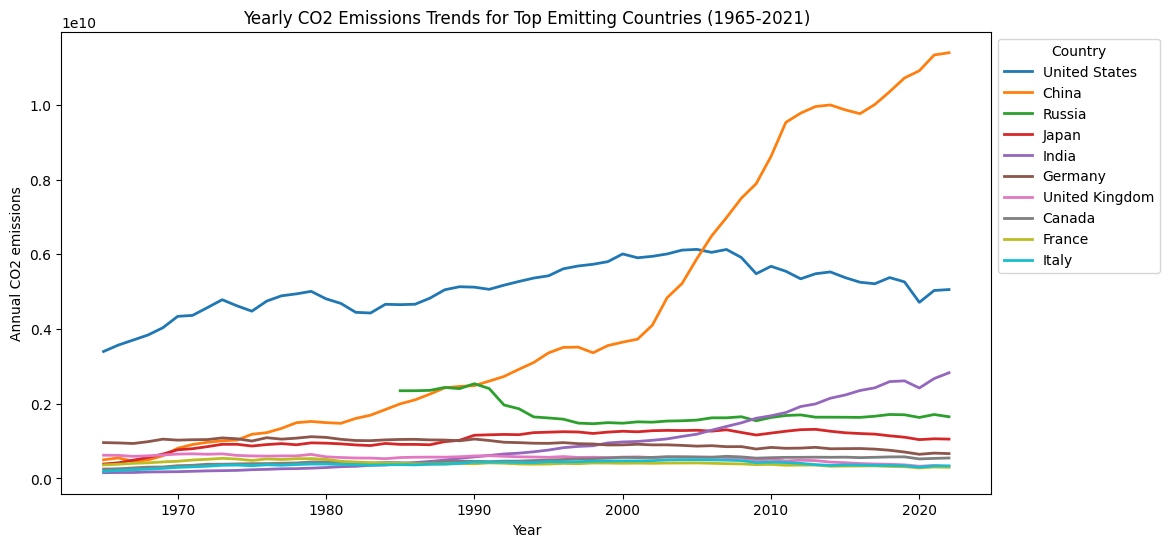

In [143]:
# Make a lineplot of Entity versus Year
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Loop through unique entities and plot each line
for entity in top_co2_col:
    entity_data = df_carbon_co2[df_carbon_co2["Entity"] == entity]
    plt.plot(entity_data["Year"], entity_data["Annual CO₂ emissions"], label=entity, linewidth=2)

plt.xlabel("Year")
plt.ylabel("Annual CO2 emissions")
plt.title("Yearly CO2 Emissions Trends for Top Emitting Countries (1965-2021)")

# Show the legend
plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Get same results using Seaborn

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='Year', ylabel='Annual CO₂ emissions'>

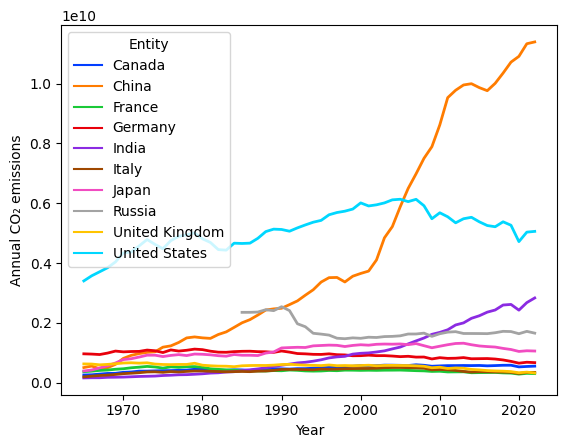

In [243]:
# Use Seaborn's lineplot
sns.lineplot(data=df_top_co2, x="Year", y="Annual CO₂ emissions", hue="Entity", linewidth=2, palette="bright")


#### Make a scatterplot of GDP per capita vs Annual CO2 Emissions

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

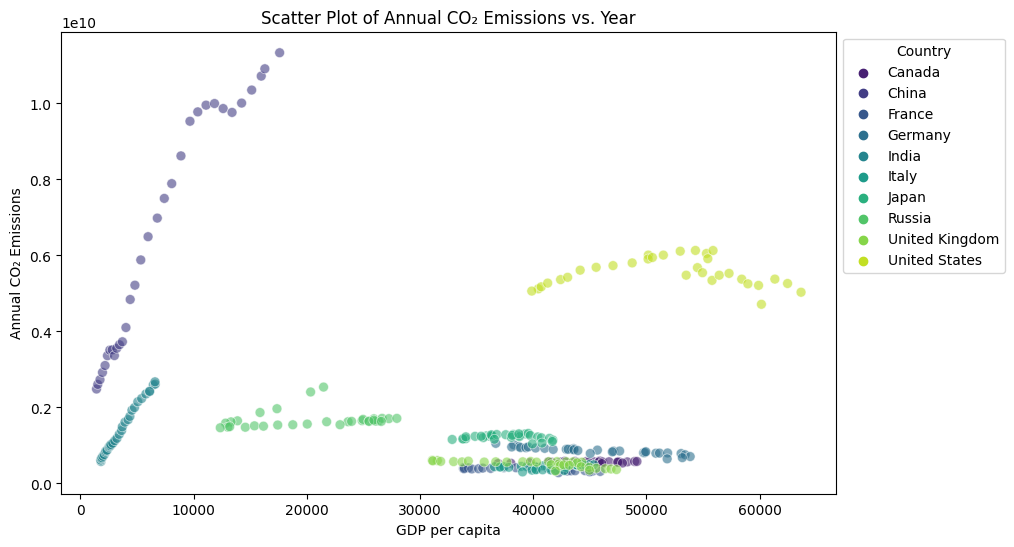

In [174]:
# Let's use seaborn combined with matplotlib 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_co2, x="GDP per capita, PPP (constant 2017 international $)", y="Annual CO₂ emissions", hue="Entity", palette="viridis", alpha=0.6, s=50)

# Label the plot
plt.xlabel("GDP per capita")
plt.ylabel("Annual CO₂ Emissions")
plt.title("Scatter Plot of Annual CO₂ Emissions vs. Year")

# Show the legend
plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### Make a histogram for CO2 emission intensity of the top 3 countries with highest average CO2 emission intensity

In [202]:
# Find top countries
top_intensity_mean = df_rank_mean.sort_values("Annual CO₂ emissions per unit energy (kg per kilowatt-hour)", ascending=False).head(3)
top_intensity_mean

,Entity,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Score,Rank
108,Lesotho,0.000182,0.086875,8.705710,7.0
62,Equatorial Guinea,0.000288,0.061199,6.148726,9.0
199,Turks and Caicos Islands,0.000020,0.053130,5.315018,16.0


In [203]:
# Get columns
top_intensity_col = top_intensity_mean["Entity"].unique()

# Filter dataframe for these top 3 countries only
df_top_intensity = df_carbon_co2[df_carbon_co2["Entity"].isin(top_intensity_col)]
df_top_intensity


,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),"GDP per capita, PPP (constant 2017 international $)",Continent
2815,Equatorial Guinea,GNQ,1980,58624.0,0.234707,NaN,NaN
2816,Equatorial Guinea,GNQ,1981,69616.0,0.279416,NaN,NaN
2817,Equatorial Guinea,GNQ,1982,73280.0,0.236461,NaN,NaN
2818,Equatorial Guinea,GNQ,1983,62288.0,0.200966,NaN,NaN
2819,Equatorial Guinea,GNQ,1984,80608.0,0.259417,NaN,NaN
...,...,...,...,...,...,...,...
9632,Turks and Caicos Islands,TCA,2017,351744.0,0.368263,25207.832,NaN
9633,Turks and Caicos Islands,TCA,2018,362736.0,0.378713,25567.918,NaN
9634,Turks and Caicos Islands,TCA,2019,362736.0,0.367497,25933.512,NaN
9635,Turks and Caicos Islands,TCA,2020,359072.0,0.431801,18474.865,NaN


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


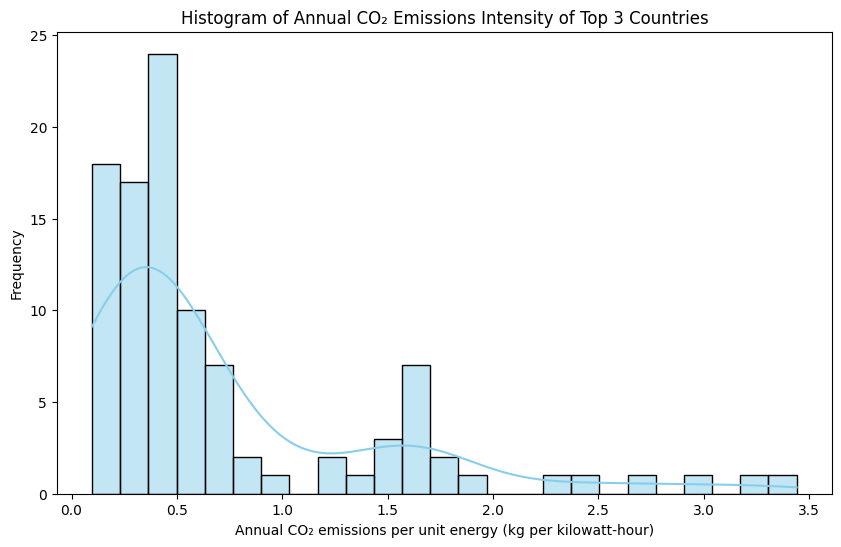

In [241]:
# Using seaborn and matplotlib to plot a histogram
plt.figure(figsize=(10, 6))

sns.histplot(data=df_top_intensity, x="Annual CO₂ emissions per unit energy (kg per kilowatt-hour)", bins=25, kde=True, color="skyblue")

plt.xlabel("Annual CO₂ emissions per unit energy (kg per kilowatt-hour)")
plt.ylabel("Frequency")
plt.title("Histogram of Annual CO₂ Emissions Intensity of Top 3 Countries")

plt.show()

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Figure size 1000x600 with 0 Axes>

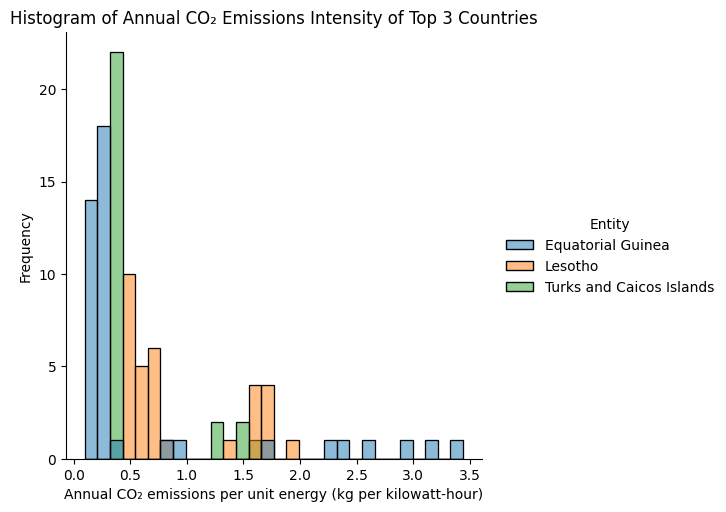

In [258]:
# Using seaborn and matplotlib to plot a histogram with displot this time
plt.figure(figsize=(10, 6))

sns.displot(df_top_intensity, x="Annual CO₂ emissions per unit energy (kg per kilowatt-hour)", hue="Entity", bins=30)

plt.xlabel("Annual CO₂ emissions per unit energy (kg per kilowatt-hour)")
plt.ylabel("Frequency")
plt.title("Histogram of Annual CO₂ Emissions Intensity of Top 3 Countries")

plt.show()

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Figure size 1000x600 with 0 Axes>

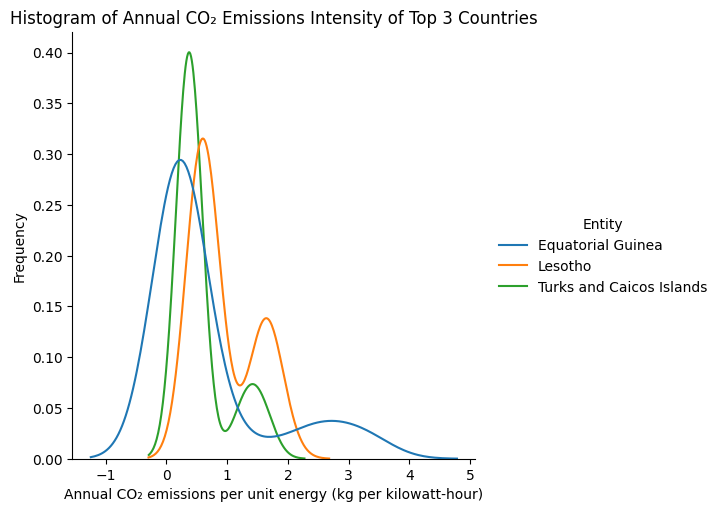

In [260]:
# We can also use the smooth kernel density (kde) plot within displot
plt.figure(figsize=(10, 6))

sns.displot(df_top_intensity, x="Annual CO₂ emissions per unit energy (kg per kilowatt-hour)", kind="kde", hue="Entity")

plt.xlabel("Annual CO₂ emissions per unit energy (kg per kilowatt-hour)")
plt.ylabel("Frequency")
plt.title("Histogram of Annual CO₂ Emissions Intensity of Top 3 Countries")

plt.show()

#### Make a barplot for the country scores of CO2 emission behaviors

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


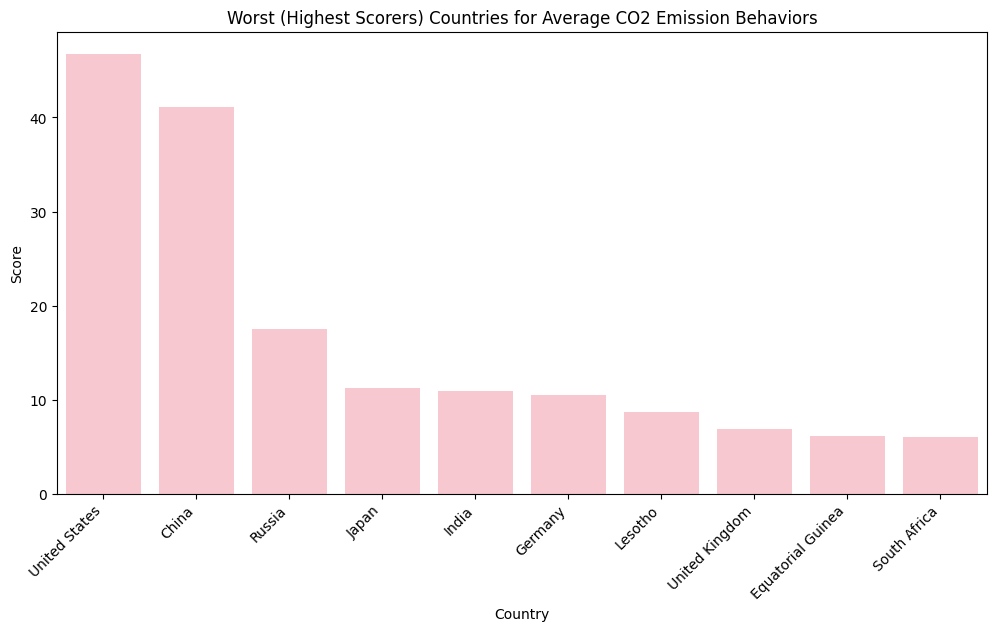

In [250]:
# Get top 10 highest scorers, which means they have the worst behaviors
high_scores = df_rank_mean.head(10)

# Create a barplot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=high_scores, x="Entity", y="Score", color="pink")

# set labels and titles
plt.title("Worst (Highest Scorers) Countries for Average CO2 Emission Behaviors")
plt.xlabel("Country")
plt.ylabel("Score")

# adjust label 
plt.xticks(rotation=45, ha="right")
plt.show()


We can also try this with Matplotlib

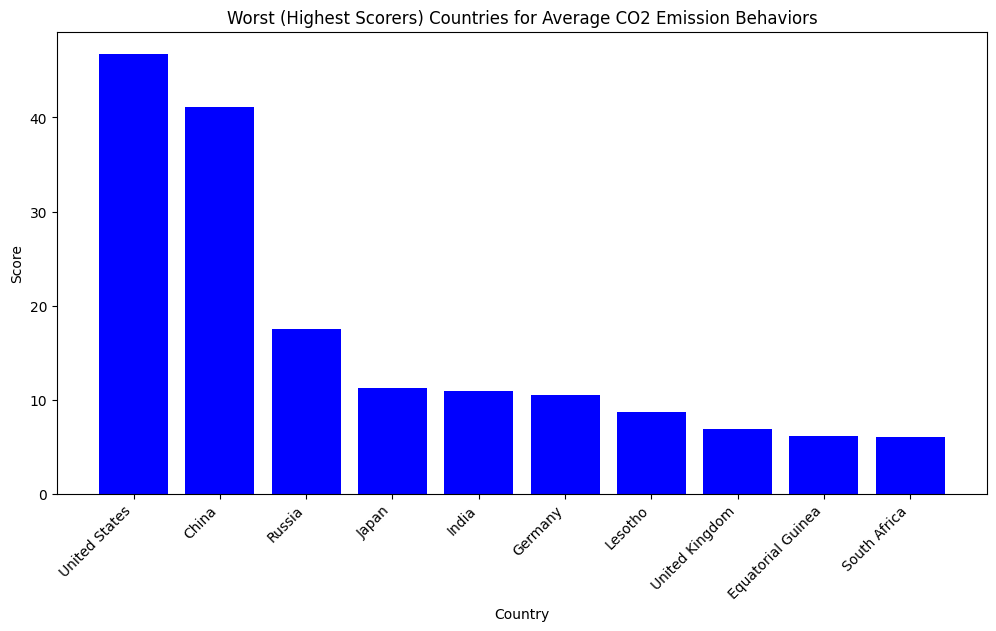

In [217]:
plt.figure(figsize=(12, 6))
plt.bar(high_scores["Entity"], high_scores["Score"], color="blue")

# set labels and titles
plt.title("Worst (Highest Scorers) Countries for Average CO2 Emission Behaviors")
plt.xlabel("Country")
plt.ylabel("Score")

# adjust label 
plt.xticks(rotation=45, ha="right")
plt.show()

#### Make a nested barplot for the Annual CO2 Emission of United States and China as countries with worst CO2 Emission behaviors

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Figure size 1200x600 with 0 Axes>

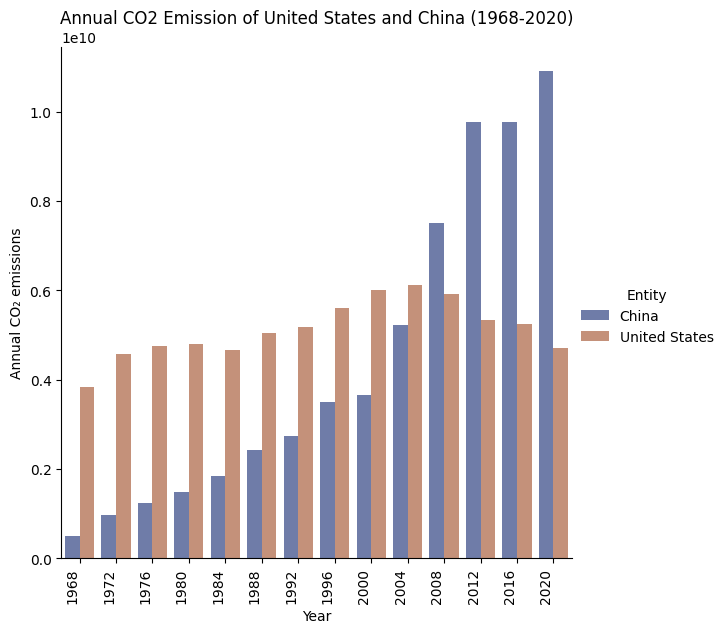

In [254]:
# dataframe for us and china data only in 4 year intervals
df_us_china = df_carbon_co2[(df_carbon_co2["Entity"].isin(["United States", "China"])) & (df_carbon_co2["Year"] % 4 == 0)]

# Draw a nested barplot
plt.figure(figsize=(12, 6))
sns.catplot(data=df_us_china, kind="bar", x="Year", y="Annual CO₂ emissions", hue="Entity", errorbar="sd", palette="dark", alpha=0.6, height=6)

# set labels and titles
plt.title("Annual CO2 Emission of United States and China (1968-2020)")
plt.xlabel("Year")
plt.ylabel("Annual CO₂ emissions")

# adjust layout 
plt.xticks(rotation=90, ha="right")
plt.show()

#### Make a heatmap to visualize the correlation matrix of our data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


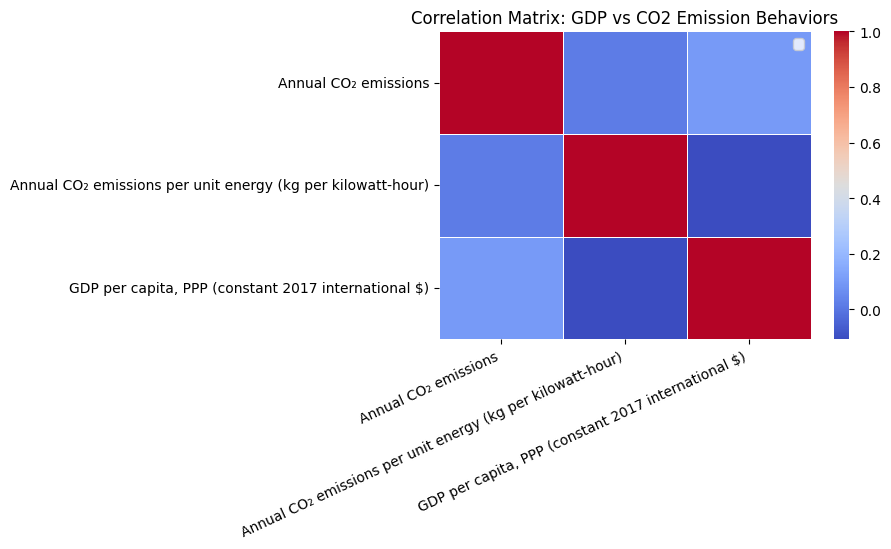

In [235]:
# Using seaborn again this time for efficiency
plt.figure(figsize=(6, 4))
sns.heatmap(df_carbon_co2_corr, cmap="coolwarm", fmt="0.3f", linewidths=0.5)

# set title
plt.title("Correlation Matrix: GDP vs CO2 Emission Behaviors")

# adjust layout 
plt.xticks(rotation=25, ha="right")  
plt.legend()
plt.show()

#### Now, we know how to combine multiple datasets and visualize them with different types!